# Import libraries

In [1]:
import gzip
import pickle
from tqdm import tqdm
import os
os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define all folder paths
root_folder = './'
bulk_data_folder = os.path.join(root_folder, 'bulk_data/')
extracted_dict_folder = os.path.join(root_folder, 'extracted_data/')
filtered_data_folder = os.path.join(root_folder, 'filtered_data/')
os.makedirs(filtered_data_folder, exist_ok = True)

# Get all extracted data

## Extracting all patents into list of dicts

In [3]:
extracted_paths = []
while len(extracted_paths) < 2490:
    extracted_paths = [path for path in os.listdir(extracted_dict_folder) if path[-3:] == '.gz']
print(len(extracted_paths), sorted(extracted_paths[:10]))

2490 ['ipg060307.pkl.gz', 'ipg081028.pkl.gz', 'ipg081125.pkl.gz', 'ipg100413.pkl.gz', 'pftaps19790529_wk22.pkl.gz', 'pftaps19900925_wk39.pkl.gz', 'pftaps19911119_wk47.pkl.gz', 'pftaps19920107_wk01.pkl.gz', 'pg010227.pkl.gz', 'pg030225.pkl.gz']


In [4]:
# Check if there was any error
extracted_paths_errors = [path for path in os.listdir(extracted_dict_folder) if path[-4:] == '.txt']
print(extracted_paths_errors)

[]


In [5]:
# There are some citations that instead of being uids are list of uids
def adjust_list_citations(citations, index_to_print):
    new_citations = []
    for citation in citations:
        if type(citation) == list:
            print(index_to_print, 'PROBLEM LIST', flush=True)
            new_citations += citation
        elif type(citation) == str:
            new_citations.append(citation)
        else:
            print(index_to_print, f"Strange type for citation {citation}")
            new_citations.append(citation)
    return new_citations

In [6]:
# Adjust citations and check if there are empty patents
all_patents = []
problem_patents_years = {}
ok_patents_years = {}
for archive_path_name in tqdm(sorted(extracted_paths)):
    with gzip.open(os.path.join(extracted_dict_folder, archive_path_name), 'rb') as fp:
        patents = pickle.load(fp)
    # get current year
    for i,patent in enumerate(patents):
        if patent['year'] is not None:
            year = patent['year']
            break
    if year not in problem_patents_years:
        problem_patents_years[year] = 0
        ok_patents_years[year] = 0
        
    for i,patent in enumerate(patents):
        if patent['uid'] == '':
            problem_patents_years[year] += 1
        else:
            ok_patents_years[year] += 1
            # adjusting citations
            patents[i]['citations'] = adjust_list_citations(patent['citations'],archive_path_name)
    # removing empty patents
    all_patents += [patent for patent in patents if patent['uid'] != '']

100%|██████████| 2490/2490 [05:28<00:00,  7.58it/s] 


In [7]:
for year, num_problems in problem_patents_years.items():
    print(year, '\tok', ok_patents_years[year], '\terror', problem_patents_years[year])

2005 	ok 157829 	error 0
2006 	ok 196489 	error 0
2007 	ok 182978 	error 0
2008 	ok 185260 	error 0
2009 	ok 192052 	error 0
2010 	ok 244599 	error 0
2011 	ok 248101 	error 0
2012 	ok 277285 	error 0
2013 	ok 303642 	error 0
2014 	ok 327014 	error 0
2015 	ok 326969 	error 0
2016 	ok 334674 	error 0
2017 	ok 352547 	error 0
2018 	ok 341104 	error 0
2019 	ok 392618 	error 0
2020 	ok 390572 	error 0
2021 	ok 363795 	error 0
2022 	ok 263237 	error 0
1976 	ok 48231 	error 0
1977 	ok 51487 	error 0
1978 	ok 48057 	error 0
1979 	ok 36909 	error 0
1980 	ok 47447 	error 0
1981 	ok 49429 	error 0
1982 	ok 41251 	error 0
1983 	ok 40639 	error 0
1984 	ok 50874 	error 0
1985 	ok 49354 	error 0
1986 	ok 50682 	error 0
1987 	ok 63291 	error 0
1988 	ok 52890 	error 0
1989 	ok 59225 	error 0
1990 	ok 59171 	error 0
1991 	ok 67825 	error 0
1992 	ok 58754 	error 0
1993 	ok 62999 	error 0
1994 	ok 61388 	error 0
1995 	ok 62461 	error 0
1996 	ok 64417 	error 0
1997 	ok 62141 	error 0
1998 	ok 75148 	error 

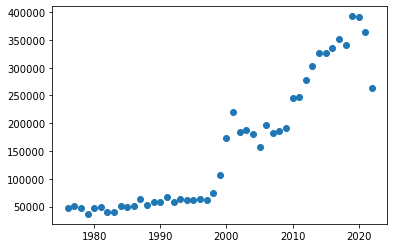

In [8]:
plt.scatter(ok_patents_years.keys(), ok_patents_years.values())
# plt.yscale('log')

## Creating DataFrame of all patents

In [9]:
all_patents_df = pd.DataFrame(all_patents)

In [10]:
len(all_patents), len(all_patents_df)

(7398829, 7398829)

In [11]:
len(all_patents), len(all_patents_df)

(7398829, 7398829)

In [12]:
all_patents_df_no_nan = all_patents_df[pd.notna(all_patents_df['year'])]
len(all_patents_df_no_nan)

7398829

All empty patents have been disregarded

In [13]:
time_ordered_all_patents_df_no_nan = all_patents_df_no_nan.sort_values(['grant_date', 'uid'], inplace=False)
time_ordered_all_patents_df_no_nan

,uid,grant_date,kind,app_date,abstract,title,citations,IPC_main_class,IPC_further_classes,IPC_edition,US_main_class,US_further_classes,US_edition,inventors,year
5132884,4004552,19740125,Utility,19750609,An egg incubating tray has its egg cells arran...,Egg incubating tray with rack and slide,"[1544311, 2006938, 2061064, 2087044, 2143536, ...",A01K 4100,[],,119 43,[],2,[Levin; Gerd],1974
5083907,3935657,19750203,Utility,19740703,Apparatus is disclosed for receiving and resti...,Rifle rest,"[577026, 2774563, 2877689, 3012350, 3041938, 3...",F41C 2900,[],,42 94,[],2,[Wade; Virdell H.],1975
5099029,3958378,19750525,Utility,19741022,This invention relates to a self-contained pre...,Burial crypt,"[912368, 998908, 1204686, 1523851, 1752572, 25...",E04H 1300,[],,52136,52 79,2,[Omeechevarria; Gerardo],1975
5111590,3977048,19750831,Utility,19750915,A resilient one piece sheet metal clip having ...,Molding clips,"[2837184, 2981387, 3004643, 3006444, 1,407,821...",A44B 2100,[E04F 1902],,24 73FT,52718,2,[Benedetti; Edward R.],1975
5117624,3985221,19751028,Utility,19751028,A tube feeder has a longitudinal support equip...,Tube feeder with self-adjusting loader,"[2771662, 2838158, 2880844, 3200679, 3306472, ...",B65G 4706,[],,198474,"[51215H, 82 27, 82102, 214 1PB, 198862]",2,[Lueders; Willi H.],1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074220,RE049214,20220920,E1,20190524,"An aircraft, the aircraft including a whole-a...",Intelligent ballistic parachute system that pe...,[],B64D 17/34,"[B64C 13/04, B64D 17/72, B64D 17/00]",20060101,B64D 17/343,"[B64C 13/04, B64D 17/725]",20130101,"[Fleming, III; Hoyt Augustus]",2022
5074221,RE049215,20220920,E1,20200517,A wave forming apparatus has a channel for co...,Wave generating apparatus and method,[],E04H 4/00,"[A63G 31/00, A63B 69/00, A63B 71/04]",20060101,E04H 4/0006,"[A63B 69/0093, A63B 71/04, A63G 31/007, Y10T 2...",20130101,[McFarland; Bruce],2022
5074222,RE049216,20220920,E1,20160908,A heat sink system to conduct heat away from ...,Heat sink system having thermally conductive rods,[],H01L 23/427,"[F28F 13/00, F28F 3/02]",20060101,H01L 23/427,"[F28F 13/00, F28F 3/022, F28F 2013/005, H01L 2...",20130101,[Lin; Philip],2022
5074223,RE049217,20220920,E1,20200710,A monitoring system 22 for a distributed ante...,Monitoring system for a distributed antenna sy...,[],H04B 17/00,"[H04B 17/16, G01R 29/08, H04B 17/40, H04W 24/1...",20150101,H04B 17/16,"[H04B 17/17, G01R 29/0878, G01R 29/10, H04B 17...",20150115,"[Fourie; Andries Petrus Cronje, Nitch; Derek C...",2022


## Check uid

In [14]:
unique_ids = all_patents_df_no_nan.uid.unique()
len(unique_ids)

7362866

In [15]:
print((len(all_patents)-len(unique_ids)) / len(all_patents))

0.004860634027357573


Now check if the uids increase in time

In [16]:
numeric_ids = [uid.isnumeric() for uid in time_ordered_all_patents_df_no_nan.uid]

In [17]:
# For some reason there is one with a wrong date
numeric_ids[-1] = False

In [18]:
numeric_time_ordered_all_patents_df_no_nan = time_ordered_all_patents_df_no_nan[numeric_ids]

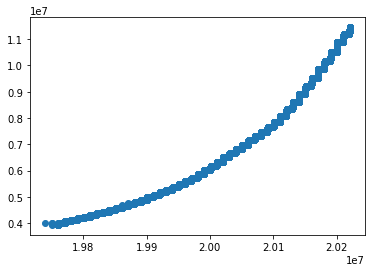

In [19]:
plt.scatter(numeric_time_ordered_all_patents_df_no_nan.grant_date.astype(int), numeric_time_ordered_all_patents_df_no_nan.uid.astype(int))

In [20]:
min_uid = numeric_time_ordered_all_patents_df_no_nan.uid.astype(int).min()
min_uid

3930271

# Consider only Utility patents and adjust all mistakes

In [21]:
correct_time_ordered_all_patents_df_no_nan = time_ordered_all_patents_df_no_nan.copy()

## Auxiliary functions

In [22]:
def clean_patent_number(patent_number):
    # print('Excluding commas and spaces and omitting leading zeroes', flush=True)
    correct_patent_number = patent_number.replace(' ', '').replace(',', '').replace(';', '').replace('.', '').replace('/', '').replace('\\', '').lstrip('0')#.upper()
    return correct_patent_number

In [23]:
def check_if_letter_after_number(patent_number):
    # Returns True or False of the check, plus two other entities
    # These are the cleaned patent number and an empty string if there is no letter_after_number
    # Otherwise returns the two strings, before and after the first letter after number
    cleaned_patent_number = clean_patent_number(patent_number)
    found_number = False
    found_letter_after_number = False
    part1 = cleaned_patent_number
    part2 = ""
    for i,char in enumerate(cleaned_patent_number):
        if char.isnumeric() == True:
            found_number = True
        # else:
        #     found_number = False
        if found_number == True and char.isnumeric() == False:
            # print(f"Found character {char} after a number")
            found_letter_after_number = True
            part1 = cleaned_patent_number[:i]
            part2 = cleaned_patent_number[i:]
            break
    return found_letter_after_number, part1, part2

In [24]:
def insert_leading_zeros(string, num_characters):
    return '0'*(num_characters-len(string))+string

In [25]:
def flatten_list(l):
    new_l = []
    if type(l) == list:
        for _ in l:
            new_l += flatten_list(_)
    else:
        new_l.append(l)
    return new_l

## Def functions types

In [26]:
def check_US_patent_number(patent_number):
    correct_patent_number = patent_number.upper()
    checks_failed = False
    try:
        # check utility
        if correct_patent_number.isnumeric() == True:
            if len(correct_patent_number) not in [6,7,8]:
                # print(f'Utility, but wrong length, it\'s {len(correct_patent_number)}', flush=True)
                checks_failed = True
            else:
                correct_patent_number = insert_leading_zeros(correct_patent_number, 8)
        # check reissue
        elif (correct_patent_number[:2] == 'RE' and correct_patent_number[2:].isnumeric()) or (correct_patent_number[0] == 'r' and correct_patent_number[1:].isnumeric() == True):
            correct_patent_number = 'RE' + insert_leading_zeros(correct_patent_number[2:], 6)
        # check plant
        elif correct_patent_number[:2] == 'PP' and correct_patent_number[2:].isnumeric():
            correct_patent_number = 'PP' + insert_leading_zeros(correct_patent_number[2:], 6)
        # check design
        elif correct_patent_number[0] == 'D' and correct_patent_number[1:].isnumeric():
            correct_patent_number = 'D' + insert_leading_zeros(correct_patent_number[1:], 7)
        # check X
        elif correct_patent_number[0].upper() == 'X' and correct_patent_number[1:].isnumeric():
            correct_patent_number = 'X' + insert_leading_zeros(correct_patent_number[1:], 7)
        # check H
        elif correct_patent_number[0].upper() == 'H' and correct_patent_number[1:].isnumeric():
            correct_patent_number = 'H' + insert_leading_zeros(correct_patent_number[1:], 7)
        # check T
        elif correct_patent_number[0].upper() == 'T' and correct_patent_number[1:].isnumeric():
            correct_patent_number = 'T' + insert_leading_zeros(correct_patent_number[1:], 7)
        else:
            checks_failed = True
            # print(f'{correct_patent_number} not recognized')
    except:
        checks_failed = True
        print("problem",len(patent_number),patent_number,flush=True)
        raise IndexError
    return correct_patent_number, checks_failed

In [27]:
def check_patent_number(patent_number):    
    cleaned_patent_number = clean_patent_number(patent_number)
    checks_failed = False
    # check US patent
    if cleaned_patent_number[:2].upper() == 'US':
        correct_patent_number, checks_failed = check_US_patent_number(cleaned_patent_number[:2])
        if checks_failed == True:
            correct_patent_number = correct_patent_number
        else:
            correct_patent_number = 'US' + correct_patent_number
    # check WO patent (WO patents are granted by the World Intellectual Property Organization, also referred to as WIPO)
    if cleaned_patent_number[:2].upper() == 'WO':
        correct_patent_number = cleaned_patent_number
    else:
        correct_patent_number, checks_failed = check_US_patent_number(cleaned_patent_number)
        if checks_failed == True:
            correct_patent_number = correct_patent_number
        else:
            correct_patent_number = 'US' + correct_patent_number
    # else:
        # print(f'{correct_patent_number} not recognized')
    return correct_patent_number, checks_failed

In [28]:
def ignore_kind_in_patent_number(patent_number):
    found_letter_after_number, part1, part2 = check_if_letter_after_number(patent_number)
    correct_patent_number, checks_failed = check_patent_number(part1)
    return correct_patent_number

In [29]:
def check_list_patent_numbers(list_patent_numbers):
    # if there is list of lists, flatten it
    flatten_list_patent_numbers = flatten_list(list_patent_numbers)
    correct_list_patent_numbers = []
    for patent_number in flatten_list_patent_numbers:
        cleaned_patent_number = clean_patent_number(patent_number)
        if cleaned_patent_number is not None and len(cleaned_patent_number) > 0:
            found_letter_after_number, part1, part2 = check_if_letter_after_number(cleaned_patent_number)
            correct_patent_number, checks_failed = check_patent_number(part1)
            correct_list_patent_numbers.append(correct_patent_number)
        # else:
        #     print(patent_number)
    return correct_list_patent_numbers

In [30]:
def is_utility(patent_number):
    cleaned_patent_number = clean_patent_number(patent_number)
    # check US patent
    if cleaned_patent_number[:2].upper() == 'US':
        cleaned_patent_number = cleaned_patent_number[2:]
    if cleaned_patent_number.isnumeric() == True and len(cleaned_patent_number) in [6,7,8]:
        return True
    else:
        return False

## Adjusting uids

In [31]:
correct_uids = time_ordered_all_patents_df_no_nan.uid.apply(lambda x: ignore_kind_in_patent_number(x))
correct_uids

5132884    US04004552
5083907    US03935657
5099029    US03958378
5111590    US03977048
5117624    US03985221
              ...    
5074220    USRE049214
5074221    USRE049215
5074222    USRE049216
5074223    USRE049217
5152156    US04030324
Name: uid, Length: 7398829, dtype: object

In [32]:
set_uids = set(correct_uids)

In [33]:
print(len(set_uids), len(correct_uids), len(set_uids) / len(correct_uids))
print(f'There are {len(correct_uids) - len(set_uids)} duplicates')

7362866 7398829 0.9951393659726424
There are 35963 duplicates


Check if all are categorized correctly as US patent number

In [34]:
US_uids = []
WO_uids = []
other_uids = []
for uid in tqdm(correct_uids):
    if uid[:2] == 'US':
        US_uids.append(uid)
    elif uid[:2] == 'WO':
        WO_uids.append(uid)
    else:
        other_uids.append(uid)
print(len(US_uids), len(WO_uids), len(other_uids))

100%|██████████| 7398829/7398829 [00:03<00:00, 2182485.65it/s]

7398829 0 0


Patents are categorized correctly as US patent number

In [35]:
correct_time_ordered_all_patents_df_no_nan['correct_uid'] = correct_uids

## Check all patents with grant date different than expected according to the uid

In [36]:
correct_time_ordered_all_patents_df_no_nan = correct_time_ordered_all_patents_df_no_nan.sort_values(['grant_date', 'correct_uid'], inplace=False)

Usually it's just a typo in the year

Repeat from here if other problems have been found

In [37]:
time_ordered_uids = correct_time_ordered_all_patents_df_no_nan.correct_uid.values
time_ordered_grant_dates = correct_time_ordered_all_patents_df_no_nan.grant_date.values
time_ordered_years = correct_time_ordered_all_patents_df_no_nan.year.values

In [38]:
previous_uid = ''
problems = []
for i, uid in tqdm(enumerate(time_ordered_uids[::-1])):
    date = time_ordered_grant_dates[::-1][i]
    if uid[2:].isnumeric() and previous_uid[2:].isnumeric() and int(uid[2:]) > int(previous_uid[2:]):
        problems.append(uid)
    previous_uid = uid

7398829it [00:13, 554198.35it/s]


In [39]:
len(problems)

15

In [40]:
problems

['US06015565',
 'US04759795',
 'US04766723',
 'US04719834',
 'US04669808',
 'US04395190',
 'US04101077',
 'US04097313',
 'US04030279',
 'US03976417',
 'US03958783',
 'US03958656',
 'US04006890',
 'US03993085',
 'US04004552']

Solving these problems by hand.

Looking for "US xxxxxxxx" in https://ppubs.uspto.gov/pubwebapp/

In [41]:
print("{")
for uid in problems:
    print(f'"{uid}" : "",')
print("}")

{
"US06015565" : "",
"US04759795" : "",
"US04766723" : "",
"US04719834" : "",
"US04669808" : "",
"US04395190" : "",
"US04101077" : "",
"US04097313" : "",
"US04030279" : "",
"US03976417" : "",
"US03958783" : "",
"US03958656" : "",
"US04006890" : "",
"US03993085" : "",
"US04004552" : "",
}


In [42]:
new_grant_dates = \
{
    "US06015565" : "20000118",
    "US04759795" : "19880726",
    "US04766723" : "19880830",
    "US04719834" : "19880119",
    "US04669808" : "19870602",
    "US04395190" : "19830726",
    "US04101077" : "19780718",
    "US04097313" : "19780627",
    "US04030324" : "19770621",
    "US04030279" : "19770621",
    "US04006890" : "19770208",
    "US04006600" : "19770208",
    "US04004552" : "19770125",
    "US03985221" : "19761012",
    "US03977048" : "19760831",
    "US03976417" : "19760824",
    "US03958783" : "19760525",
    "US03958656" : "19760525", 
    "US03958515" : "19760525",
    "US03958378" : "19760525",
    "US03993085" : "19761123",
    "US03935657" : "19760203",
}

In [43]:
time_ordered_uids_list = list(time_ordered_uids)
for uid, date in new_grant_dates.items():
    index = time_ordered_uids_list.index(uid)
    time_ordered_grant_dates[index] = date
    time_ordered_years[index] = int(date[:4])

In [44]:
correct_time_ordered_all_patents_df_no_nan.grant_date = time_ordered_grant_dates
correct_time_ordered_all_patents_df_no_nan.year = time_ordered_years

In [45]:
correct_time_ordered_all_patents_df_no_nan = correct_time_ordered_all_patents_df_no_nan.sort_values(['grant_date', 'correct_uid'], inplace=False)

In [46]:
correct_time_ordered_all_patents_df_no_nan = correct_time_ordered_all_patents_df_no_nan.reset_index(drop = True)

In [47]:
correct_time_ordered_all_patents_df_no_nan

,uid,grant_date,kind,app_date,abstract,title,citations,IPC_main_class,IPC_further_classes,IPC_edition,US_main_class,US_further_classes,US_edition,inventors,year,correct_uid
0,3930271,19760106,Utility,19741216,A golf glove is disclosed having an extra fing...,Golf glove,"[2379430, 2782422]",A41D 1900,[],,2161A,2 21,2,[Kahng; He Chung],1976,US03930271
1,3930272,19760106,Utility,19740910,A lock for a height-adjustable crib or playpen...,Crib leg lock,"[933921, 1549144, 1609246, 1667080, 1834468, 2...",A47D 701,[],,5 11,"[5100, 248423, 403107]",2,[Boudreau; Robert J.],1976,US03930272
2,3930273,19760106,Utility,19750110,A bed safety side rail arrangement which inclu...,Bed safety side rail arrangement,"[1240201, 2817855, 3093839, 3125769, 3175453, ...",A47D 702,[A47C 2100],,5331,5100,2,[Stern; Robert C.],1976,US03930273
3,3930274,19760106,Utility,19741011,The assembly includes a longitudinal axis and ...,Assembly for use in recreational activities,"[2546396, 3064370, 3601076]",B63B 708,[],,9 2A,"[150 51, 220 12]",2,[Syfritt; Harold A.],1976,US03930274
4,3930275,19760106,Utility,19750331,A novel slipper and its method of fabrication ...,Method of fabricating a slipper,"[914377, 2971278, 3311937]",A43D 900,[],,12142S,[],2,[Bailin; Richard],1976,US03930275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398824,RE049213,20220920,E1,20200723,A media pack for including in a filter cartri...,Air filter arrangement; air cleaner assembly; ...,[],B01D 46/52,"[B01D 46/00, F02M 35/024]",20060101,B01D 46/526,"[B01D 46/0005, B01D 46/522, B01D 46/525, F02M ...",20130101,"[Nelson; Benny K., Nelson; David W.]",2022,USRE049213
7398825,RE049214,20220920,E1,20190524,"An aircraft, the aircraft including a whole-a...",Intelligent ballistic parachute system that pe...,[],B64D 17/34,"[B64C 13/04, B64D 17/72, B64D 17/00]",20060101,B64D 17/343,"[B64C 13/04, B64D 17/725]",20130101,"[Fleming, III; Hoyt Augustus]",2022,USRE049214
7398826,RE049215,20220920,E1,20200517,A wave forming apparatus has a channel for co...,Wave generating apparatus and method,[],E04H 4/00,"[A63G 31/00, A63B 69/00, A63B 71/04]",20060101,E04H 4/0006,"[A63B 69/0093, A63B 71/04, A63G 31/007, Y10T 2...",20130101,[McFarland; Bruce],2022,USRE049215
7398827,RE049216,20220920,E1,20160908,A heat sink system to conduct heat away from ...,Heat sink system having thermally conductive rods,[],H01L 23/427,"[F28F 13/00, F28F 3/02]",20060101,H01L 23/427,"[F28F 13/00, F28F 3/022, F28F 2013/005, H01L 2...",20130101,[Lin; Philip],2022,USRE049216


## Check kind of utility uids

Utility patents had kind "A" before 2001, and "B1" and "B2" afterwards.

The difference between "B1" and "B2" is that in B1 there is no published application before it was grant as a patent, while B2 has had a pre-grant published application.

Therefore, we will keep all these 3 categories, since in our database we do not have applications, but only grant patents.

In [48]:
is_utility_list = correct_time_ordered_all_patents_df_no_nan.uid.apply(lambda x: is_utility(x))

In [49]:
correct_time_ordered_all_patents_df_no_nan['is_utility'] = is_utility_list

In [50]:
utility_time_ordered_all_patents_df_no_nan = correct_time_ordered_all_patents_df_no_nan[correct_time_ordered_all_patents_df_no_nan['is_utility']].reset_index(drop = True)

In [51]:
utility_time_ordered_all_patents_df_no_nan

,uid,grant_date,kind,app_date,abstract,title,citations,IPC_main_class,IPC_further_classes,IPC_edition,US_main_class,US_further_classes,US_edition,inventors,year,correct_uid,is_utility
0,3930271,19760106,Utility,19741216,A golf glove is disclosed having an extra fing...,Golf glove,"[2379430, 2782422]",A41D 1900,[],,2161A,2 21,2,[Kahng; He Chung],1976,US03930271,True
1,3930272,19760106,Utility,19740910,A lock for a height-adjustable crib or playpen...,Crib leg lock,"[933921, 1549144, 1609246, 1667080, 1834468, 2...",A47D 701,[],,5 11,"[5100, 248423, 403107]",2,[Boudreau; Robert J.],1976,US03930272,True
2,3930273,19760106,Utility,19750110,A bed safety side rail arrangement which inclu...,Bed safety side rail arrangement,"[1240201, 2817855, 3093839, 3125769, 3175453, ...",A47D 702,[A47C 2100],,5331,5100,2,[Stern; Robert C.],1976,US03930273,True
3,3930274,19760106,Utility,19741011,The assembly includes a longitudinal axis and ...,Assembly for use in recreational activities,"[2546396, 3064370, 3601076]",B63B 708,[],,9 2A,"[150 51, 220 12]",2,[Syfritt; Harold A.],1976,US03930274,True
4,3930275,19760106,Utility,19750331,A novel slipper and its method of fabrication ...,Method of fabricating a slipper,"[914377, 2971278, 3311937]",A43D 900,[],,12142S,[],2,[Bailin; Richard],1976,US03930275,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606209,11452247,20220920,B2,20191119,"A carrier tape has a central portion, and fir...","Multi-row carrier tape with alternating, stagg...",[],H01L 21/673,[H05K 13/00],20060101,H05K 13/0084,"[H01L 21/67333, H01L 2221/68313]",20130101,[Oliverius; Todd M.],2022,US11452247,True
6606210,11452248,20220920,B2,20170208,A work machine including a work head includin...,Work machine,[],H05K 13/02,"[H05K 13/04, B25J 15/06, G05B 19/4061, H05K 13...",20060101,H05K 13/022,"[B25J 9/1676, B25J 15/06, B25J 15/0616, G05B 1...",20130101,[Matsumoto; Toru],2022,US11452248,True
6606211,11452249,20220920,B2,20181205,A carrier for reversibly immobilizing one or ...,Carrier for reversibly immobilizing one or mor...,[],H05K 13/04,"[B29C 48/08, B29C 48/00, B65B 15/04, B65D 73/0...",20060101,H05K 13/0419,"[B29C 48/0021, B29C 48/08, B65B 15/04, B65D 73...",20180801,[Varma; Rajesh Kumar],2022,US11452249,True
6606212,11452250,20220920,B2,20190808,A substrate inspection device that is placed ...,Substrate inspection device that inspects appl...,[],H05K 13/08,"[G06T 7/11, G01N 21/956, G06T 7/00, H05K 3/34,...",20060101,H05K 13/0817,"[G01N 21/95684, G06T 7/0006, G06T 7/11, H05K 3...",20180801,"[Futamura; Ikuo, Ohyama; Tsuyoshi, Sakaida; No...",2022,US11452250,True


In [52]:
utility_time_ordered_all_patents_df_no_nan.kind.value_counts()

B2         4392266
Utility    1352129
B1          859273
A             2505
Reissue         28
Design          10
TVPP             3
Name: kind, dtype: int64

In [53]:
utility_time_ordered_all_patents_df_no_nan[utility_time_ordered_all_patents_df_no_nan.kind == 'TVPP'].year.value_counts()

1980    1
1983    1
1985    1
Name: year, dtype: int64

Checking the patents of kind "Reissue", "Design" and "TVPP", these are actually utility functions and are considered now as such.

In [54]:
kind_list = list(utility_time_ordered_all_patents_df_no_nan.kind.values)

In [55]:
for i, kind in tqdm(enumerate(kind_list)):
    if kind in ['Utility', 'Reissue', 'Design', 'TVPP', 'A']:
        kind_list[i] = 'A'

6606214it [00:03, 2047994.59it/s]


In [56]:
utility_time_ordered_all_patents_df_no_nan.kind = kind_list

In [57]:
utility_time_ordered_all_patents_df_no_nan.kind.value_counts()

B2    4392266
A     1354675
B1     859273
Name: kind, dtype: int64

## Adjusting citations

In [58]:
correct_citations = utility_time_ordered_all_patents_df_no_nan.citations.apply(lambda x: check_list_patent_numbers(x))
correct_citations

0                                   [US02379430, US02782422]
1          [US00933921, US01549144, US01609246, US0166708...
2          [US01240201, US02817855, US03093839, US0312576...
3                       [US02546396, US03064370, US03601076]
4                       [US00914377, US02971278, US03311937]
                                 ...                        
6606209                                                   []
6606210                                                   []
6606211                                                   []
6606212                                                   []
6606213                                                   []
Name: citations, Length: 6606214, dtype: object

In [59]:
correct_uids = list(utility_time_ordered_all_patents_df_no_nan.correct_uid)
years = list(utility_time_ordered_all_patents_df_no_nan.year)

In [60]:
set_correct_uids = set(correct_uids)

In [61]:
set_correct_uids_numbers = []
for uid in tqdm(set_correct_uids):
    set_correct_uids_numbers.append(int(uid[2:]))

100%|██████████| 6588222/6588222 [00:04<00:00, 1328973.89it/s]


In [62]:
set_correct_uids_numbers = set(set_correct_uids_numbers)

### Check if citations are found inside the set of uids

First let's check the raw number, then we will do the same on the set of citations

In [63]:
found_uids = []
not_found_uids = []
for citations in tqdm(correct_citations):
    for citation in citations:
        if citation in set_correct_uids:
            found_uids.append(citation)
        else:
            not_found_uids.append(citation)
print(len(found_uids), len(not_found_uids))

100%|██████████| 6606214/6606214 [00:27<00:00, 239962.74it/s] 

28414654 37505988


In [64]:
print(f'Found {len(found_uids)}/{len(found_uids) + len(not_found_uids)} = {len(found_uids)/(len(found_uids) + len(not_found_uids))}')

Found 28414654/65920642 = 0.43104334451111687


Now repeat using the set of all citations

In [65]:
all_ids_citations = []
for citations in tqdm(correct_citations):
    all_ids_citations += citations

set_all_ids_citations = set(all_ids_citations)

100%|██████████| 6606214/6606214 [00:03<00:00, 2183152.05it/s]


In [66]:
print(len(set_all_ids_citations), len(all_ids_citations), len(set_all_ids_citations) / len(all_ids_citations))

8707523 65920642 0.13209099207498617


In [67]:
found_uids = []
not_found_uids = []
for citation in tqdm(set_all_ids_citations):
    if citation in set_correct_uids:
        found_uids.append(citation)
    else:
        not_found_uids.append(citation)
print(len(found_uids), len(not_found_uids))

100%|██████████| 8707523/8707523 [00:05<00:00, 1584256.24it/s]

2768815 5938708


In [68]:
print(f'Found {len(found_uids)}/{len(found_uids) + len(not_found_uids)} = {len(found_uids)/(len(found_uids) + len(not_found_uids))}')

Found 2768815/8707523 = 0.31797963668887236


In [69]:
print(not_found_uids[:10])

['US01656105', 'US03891289', 'USD0458653', 'US01403181', 'US04401713', '1020000057085', 'WO2005113868', 'US05409963', 'US05392164', 'US61125092']


### Check if not found citations that have a a year in front are actually US utility patents

This is run on the last not_found_uids, which was run on the set of all citations

In [70]:
long_numbers = []
long_numbers_w_year = {}
long_numbers_w_year_in_uids = {}
for uid in tqdm(not_found_uids):
    uid_no_kind = ignore_kind_in_patent_number(uid)
    if uid_no_kind.isnumeric() and len(uid_no_kind) > 8:
        long_numbers.append(uid)
        if len(uid_no_kind[4:]) >= 6:
            for year in range(1950,2022):
                if int(uid_no_kind[:4]) == year:
                    correct_patent_number, checks_failed = check_patent_number(uid_no_kind[4:])
                    long_numbers_w_year[uid] = (uid, correct_patent_number, year)
                    if correct_patent_number in set_correct_uids_numbers:
                        long_numbers_w_year_in_uids[uid] = (uid, correct_patent_number, year)
                    break 

100%|██████████| 5938708/5938708 [01:19<00:00, 74732.06it/s]


In [71]:
print(len(long_numbers_w_year), len(long_numbers), len(long_numbers_w_year) / len(long_numbers))

1593878 1672519 0.9529805042573507


In [72]:
print(len(long_numbers_w_year_in_uids), len(long_numbers_w_year), len(long_numbers_w_year_in_uids) / len(long_numbers_w_year))

0 1593878 0.0


In [73]:
for k, v in list(long_numbers_w_year.items())[:10]:
    print(k, v)

20050050308 ('20050050308', '50308', 2005)
20010017844 ('20010017844', '17844', 2001)
20070123625 ('20070123625', 'US00123625', 2007)
20040079866 ('20040079866', '79866', 2004)
20040261184 ('20040261184', 'US00261184', 2004)
20080101297 ('20080101297', 'US00101297', 2008)
2000242090 ('2000242090', 'US00242090', 2000)
20050004251 ('20050004251', '4251', 2005)
20070213820 ('20070213820', 'US00213820', 2007)
20040262375 ('20040262375', 'US00262375', 2004)


Checking these ids, it seems they are from abroad countries

In [74]:
for k, v in list(long_numbers_w_year_in_uids.items())[:10]:
    print(k, v)

Now let's check if the year found in the uid is correct

In [75]:
correct_long_numbers_w_year_in_uids = {}
for wrong_uid, correct_uid, year in tqdm(long_numbers_w_year_in_uids.values()):
    index = correct_uids.index(correct_uid)
    correct_year = years[index]
    if correct_year == year:
        correct_long_numbers_w_year_in_uids[wrong_uid] = (wrong_uid, correct_uid, year)
        
print(len(correct_long_numbers_w_year_in_uids))

0it [00:00, ?it/s]

0


In [76]:
for k, v in list(correct_long_numbers_w_year_in_uids.items())[:10]:
    print(k, v)

These uids cannot be found

CONCLUSION: these cannot be considered US valid patents

### Check where these not found citations come from

In [77]:
US_citation_uids = []
WO_citation_uids = []
other_citation_uids = []
for citation in tqdm(not_found_uids):
    if citation[:2] == 'US':
        US_citation_uids.append(citation)
    elif citation[:2] == 'WO':
        WO_citation_uids.append(citation)
    else:
        other_citation_uids.append(citation)
print(len(US_citation_uids), len(WO_citation_uids), len(other_citation_uids))

100%|██████████| 5938708/5938708 [00:04<00:00, 1440371.20it/s]

3662077 481824 1794807


#### US patents

Check which ones are utility patents, and which are not

In [78]:
US_utility_citation_uids = []
US_utility_citation_uids_numbers = []
US_not_utility_citation_uids = []
for citation in tqdm(US_citation_uids):
    if is_utility(citation):
        US_utility_citation_uids.append(citation)
        US_utility_citation_uids_numbers.append(int(citation[2:]))
    else:
        US_not_utility_citation_uids.append(citation)

100%|██████████| 3662077/3662077 [00:08<00:00, 457123.02it/s]


In [79]:
print(len(US_utility_citation_uids), len(US_not_utility_citation_uids))

3526390 135687


In [80]:
US_utility_citation_uids_numbers = []
for uid in tqdm(US_utility_citation_uids):
    US_utility_citation_uids_numbers.append(int(uid[2:]))

100%|██████████| 3526390/3526390 [00:02<00:00, 1430986.99it/s]


In [81]:
min_uid = min(set_correct_uids_numbers)
print(min_uid)

3930271


In [82]:
utility_numbers_before_min_uid_number = []
not_recognized_utility_numbers = []
for num in tqdm(US_utility_citation_uids_numbers):
    if num < min_uid:
        utility_numbers_before_min_uid_number.append(num)
    else:
        not_recognized_utility_numbers.append(num)

100%|██████████| 3526390/3526390 [00:01<00:00, 3033183.41it/s]


In [83]:
print(f"Found {len(utility_numbers_before_min_uid_number)} before minimum number in dataset out of {len(US_utility_citation_uids)} utilities not found in data, i.e., fraction of {len(utility_numbers_before_min_uid_number) / len(US_utility_citation_uids)}")

Found 2563648 before minimum number in dataset out of 3526390 utilities not found in data, i.e., fraction of 0.7269893573881505


In [84]:
not_recognized_utility_numbers[:10]

[4401713,
 5409963,
 5392164,
 61125092,
 59230754,
 5134236,
 4701421,
 5759727,
 5705555,
 5663156]

In [85]:
utility_numbers_before_min_uid_number[:10]

[1656105,
 3891289,
 1403181,
 2735994,
 3759368,
 1202376,
 3571815,
 2268125,
 3391088,
 3897379]

It seems like all these are correct utility patents

### Create new columns for different types of citations

In [86]:
correct_citations

0                                   [US02379430, US02782422]
1          [US00933921, US01549144, US01609246, US0166708...
2          [US01240201, US02817855, US03093839, US0312576...
3                       [US02546396, US03064370, US03601076]
4                       [US00914377, US02971278, US03311937]
                                 ...                        
6606209                                                   []
6606210                                                   []
6606211                                                   []
6606212                                                   []
6606213                                                   []
Name: citations, Length: 6606214, dtype: object

In [87]:
US_utility_citations_in_dataset = []
US_utility_citations_not_in_dataset = []
US_other_citations = []
other_citations = []

In [88]:
for citations in tqdm(correct_citations):
    tmp_US_utility_citations_in_dataset = []
    tmp_US_utility_citations_not_in_dataset = []
    tmp_US_other_citations = []
    tmp_other_citations = []
    for citation in citations:
        if is_utility(citation):
            if citation in set_correct_uids:
                tmp_US_utility_citations_in_dataset.append(citation)
            else:
                tmp_US_utility_citations_not_in_dataset.append(citation)
        elif citation[:2] == 'US':
            tmp_US_other_citations.append(citation)
        else:
            tmp_other_citations.append(citation)
    US_utility_citations_in_dataset.append(tmp_US_utility_citations_in_dataset)
    US_utility_citations_not_in_dataset.append(tmp_US_utility_citations_not_in_dataset)
    US_other_citations.append(tmp_US_other_citations)
    other_citations.append(tmp_other_citations)

100%|██████████| 6606214/6606214 [03:15<00:00, 33815.95it/s] 


In [89]:
utility_time_ordered_all_patents_df_no_nan['US_utility_citations_in_dataset'] = US_utility_citations_in_dataset
utility_time_ordered_all_patents_df_no_nan['US_utility_citations_not_in_dataset'] = US_utility_citations_not_in_dataset
utility_time_ordered_all_patents_df_no_nan['US_other_citations'] = US_other_citations
utility_time_ordered_all_patents_df_no_nan['other_citations'] = other_citations

## Check if IPC class are ok (THEY ARE NOT OK)

### Auxiliary functions

from https://www.wipo.int/edocs/pubdocs/en/wipo-guide-ipc-2022-en-guide-to-the-international-patent-classification-2022.pdf

SECTIONS

A HUMAN NECESSITIES

B PERFORMING OPERATIONS; TRANSPORTING

C CHEMISTRY; METALLURGY

D TEXTILES; PAPER

E FIXED CONSTRUCTIONS

F MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS;

BLASTING

G PHYSICS

H ELECTRICITY


In [90]:
def is_IPC_class(c):
    # It is of the type A01B, where A is the section, 01 is the class, and B is the subclass
    # returns if it is a correct IPC class, the section, the class, and the subclass
    # last one is the group and subgroup together
    if len(c) >= 4 and c[0].isalpha() and c[1:3].isnumeric() and c[3].isalpha():
        group = c[4:].lstrip(' ')
        return True, c[0], c[1:3], c[3], group
    else:
        return False, '', '', '', ''

### Check IPC_main_class

In [91]:
IPC_main_class_list = list(utility_time_ordered_all_patents_df_no_nan.IPC_main_class.values)

In [92]:
correct_IPC_main_class_list = []
problems_list = []
for c in tqdm(IPC_main_class_list):
    is_correct, section, clas, subclas, group = is_IPC_class(c)
    if is_correct:
        correct_IPC_main_class_list.append((section, clas, subclas, group))
    else:
        problems_list.append(c)

100%|██████████| 6606214/6606214 [00:13<00:00, 497247.72it/s]


In [93]:
len(correct_IPC_main_class_list), len(IPC_main_class_list), len(correct_IPC_main_class_list) / len(IPC_main_class_list)

(6605959, 6606214, 0.9999613999788683)

In [94]:
print(len(problems))

15


In [95]:
from collections import Counter

In [96]:
counter = Counter(problems_list)

In [97]:
IPC_main_class_set = set(IPC_main_class_list)

In [98]:
counter

Counter({'5 3': 1,
         '': 13,
         '114': 2,
         'FO4C  300': 1,
         '330': 1,
         'B00': 1,
         '260': 3,
         'C10': 1,
         '415': 1,
         '352': 1,
         '9 2': 1,
         '138': 1,
         'CO7C12100': 1,
         '7 5': 1,
         'B6OP  100': 1,
         'FO4B  300': 1,
         'HO2K  524': 1,
         'C16': 1,
         '424': 1,
         '222': 1,
         'B10': 1,
         'HOlR 4304': 1,
         '252': 3,
         '428': 1,
         '357': 1,
         'E21': 3,
         'E46': 1,
         '308': 1,
         'B56': 1,
         'C87': 1,
         '560': 1,
         'AG1B 1718': 1,
         '2 1': 1,
         '116': 2,
         '318': 1,
         '403': 2,
         'F36': 2,
         '1': 1,
         'A23': 2,
         '866F 1104': 1,
         '404': 1,
         '312': 1,
         '156': 1,
         '261': 1,
         '426': 2,
         '123': 1,
         '2 1K  146': 1,
         '137': 2,
         'B6OV  308': 1,
         '7 3

Let's repeat now with the set

In [100]:
IPC_classes = []
problems = []
for c in tqdm(IPC_main_class_set):
    is_correct, section, clas, subclas, group = is_IPC_class(c)
    if is_correct:
        IPC_classes.append((section, clas, subclas, group))
    else:
        problems_list.append(c)

100%|██████████| 173355/173355 [00:00<00:00, 390055.05it/s]


In [101]:
len(IPC_classes), len(IPC_main_class_set), len(IPC_classes) / len(IPC_main_class_set)

(173161, 173355, 0.9988809091171296)

In [102]:
a = utility_time_ordered_all_patents_df_no_nan[utility_time_ordered_all_patents_df_no_nan.IPC_main_class == '']

In [103]:
pd.set_option('display.max_columns', 200)

In [104]:
a

,uid,grant_date,kind,app_date,abstract,title,citations,IPC_main_class,IPC_further_classes,IPC_edition,US_main_class,US_further_classes,US_edition,inventors,year,correct_uid,is_utility,US_utility_citations_in_dataset,US_utility_citations_not_in_dataset,US_other_citations,other_citations
1630,3932897,19760120,A,19741212,A hockey garter belt includes an elongate body...,Hockey garter belt,"[675748, 1551358, 2530850, 2579190, 2975432, 3...",,[],,2306,41F 1900,,[Young; Nathan H.],1976,US03932897,True,[],"[US00675748, US01551358, US02530850, US0257919...",[],[]
35783,3983864,19761005,A,19750707,Method and apparatus for withdrawing and analy...,Method and apparatus for in vivo blood gas ana...,"[3512517, 3572315, 3585002, 3640269, 3649199]",,[],,128 2G,"[23230B, 23232C, 734215R, 128 2F, 128 2L, 12...",,[],1976,US03983864,True,[],"[US03512517, US03572315, US03585002, US0364026...",[],[]
81589,4048653,19770913,A,19751015,Head-coupled visual display apparatus for a so...,Visual display apparatus,"[3076271, 3401233, 3614314, 3757190]",,[],,358104,358250,,[Spooner; Archer Michael],1977,US04048653,True,[],"[US03076271, US03401233, US03614314, US03757190]",[],[]
511724,4704720,19871103,A,19850102,A distributed feedback semiconductor laser in ...,Distributed-feedback semiconductor laser,"[4178604, 4237224, 4273875, 4374927, 4375514, ...",,[],,,[],,[Yamaguchi; Masayuki],1987,US04704720,True,"[US04237224, US04273875, US04375514]","[US04178604, US04374927, US02441659, US0202361...",[],[32238]
512221,4705229,19871110,A,19850827,A device for supporting a roll of material to ...,Compact apparatus for laying paving fabric,"[2258205, 3632054, 3913854, 4010859, 4148399, ...",,[],,,[],,[Barazone; Mounque],1987,US04705229,True,"[US04010859, US04148399, US04456399, US0451829...","[US02258205, US03632054, US03913854, US0391469...",[],[]
713272,5057224,19911015,A,19900411,The present invention provides a composition f...,Method for evaluating the performance of rever...,[],,[],,210635,"[210656, 2101982, 73 611C, 01D 1508]",,[],1991,US05057224,True,[],[],[],[]
766333,5156284,19921020,A,19920327,A thermally insulated baby bottle assembly con...,Thermally insulated baby bottle,"[922174, 1221335, 1415908, 1694967, 3530979, 3...",,[],,,[],,[],1992,US05156284,True,"[US04215785, US05038948, US05044509, US05069351]","[US00922174, US01221335, US01415908, US0169496...",[],[]
958698,5546824,19960820,A,19950309,"Disclosed is a high strength, self-lubricating...",Visual method and apparatus for adjusting gear...,"[3010338, 3081648, 3175110, 3199364, 3501183, ...",,[],,74421R,"[298931, 74462, 74DIG10, 116200]",,[],1996,US05546824,True,"[US04046324, US04202644, US04345851, US0436705...","[US03010338, US03081648, US03175110, US0319936...",[],[]
971015,5572915,19961112,A,19941017,A pull bar gripper assembly having a body memb...,Pull bar gripper assembly,"[1467992, 1523063, 2377383, 3582000, 3939847, ...",,[],,82127,[],,[Bertini; Millo],1996,US05572915,True,"[US03939847, US03981673, US04580470, US0461784...","[US01467992, US01523063, US02377383, US03582000]",[],[]
1027339,5702347,19971230,A,19960412,In an endoscope system including an endoscope ...,Endoscope system including endoscope and dispo...,[],,[],,600121,600123,,[],1997,US05702347,True,[],[],[],[]


### Check further classes

In [105]:
IPC_further_classes_list = list(utility_time_ordered_all_patents_df_no_nan.IPC_further_classes.values)

In [106]:
further_classes = []
problem_IPC_classes = []
num_problems = 0
num_ok = 0
for i, IPC_further_classes in tqdm(enumerate(IPC_further_classes_list)):
    further = []
    isproblem = False
    for IPC_further_class in IPC_further_classes:
        if len(IPC_further_class) >= 4 and IPC_further_class[0].isalpha() and IPC_further_class[1:3].isnumeric() and IPC_further_class[3].isalpha():
            further.append(IPC_further_class[:4])
        else:
            problem_IPC_classes.append(IPC_further_class)
            isproblem = True
    further_classes.append(further)
    if isproblem:
        num_problems += 1
    else:
        num_ok += 1

6606214it [00:15, 414756.39it/s]


In [107]:
print(num_problems, len(problem_IPC_classes) / (len(problem_IPC_classes) + len(further_classes)))

247 6.084809530325359e-05


In [109]:
for IPC_class in tqdm(problem_IPC_classes):
    if IPC_class in IPC_main_class_set:
        print(f'{IPC_class} is also found in IPC_main_class')

100%|██████████| 402/402 [00:00<00:00, 271953.26it/s]

222 is also found in IPC_main_class
106 is also found in IPC_main_class
108 is also found in IPC_main_class
B05 is also found in IPC_main_class
219 is also found in IPC_main_class
424 is also found in IPC_main_class
428 is also found in IPC_main_class
C87 is also found in IPC_main_class
119 is also found in IPC_main_class
308 is also found in IPC_main_class
137 is also found in IPC_main_class
242 is also found in IPC_main_class
F16 is also found in IPC_main_class
303 is also found in IPC_main_class
303 is also found in IPC_main_class
B65 is also found in IPC_main_class
B65 is also found in IPC_main_class
B65 is also found in IPC_main_class
242 is also found in IPC_main_class
242 is also found in IPC_main_class
242 is also found in IPC_main_class
4 3 is also found in IPC_main_class
9 2 is also found in IPC_main_class
9 2 is also found in IPC_main_class
F16 is also found in IPC_main_class
428 is also found in IPC_main_class
428 is also found in IPC_main_class
428 is also found in IPC_mai

In [110]:
problem_IPC_classes[:10]

['222',
 '106',
 '200',
 '108',
 'B05',
 '173;   218 D;218 A;218 F;218 R;218 DA;215;216;225;220;221;173;   2',
 '219',
 '172',
 '2 9',
 '424']

### Change into correct IPC classification

In [111]:
IPC_main_class_list = list(utility_time_ordered_all_patents_df_no_nan.IPC_main_class.values)

In [112]:
correct_IPC_main_class_list = []
for c in tqdm(IPC_main_class_list):
    is_correct, section, clas, subclas, group = is_IPC_class(c)
    correct_IPC_main_class_list.append((section, clas, subclas, group))

100%|██████████| 6606214/6606214 [00:11<00:00, 577992.45it/s]


In [113]:
utility_time_ordered_all_patents_df_no_nan['correct_IPC_main_class'] = correct_IPC_main_class_list

In [114]:
IPC_further_classes_list = list(utility_time_ordered_all_patents_df_no_nan.IPC_further_classes.values)

In [115]:
correct_IPC_further_classes_list = []
for classes in tqdm(IPC_further_classes_list):
    tmp_classes = []
    for c in classes:
        is_correct, section, clas, subclas, group = is_IPC_class(c)
        tmp_classes.append((section, clas, subclas, group))
    correct_IPC_further_classes_list.append(tmp_classes)

100%|██████████| 6606214/6606214 [00:54<00:00, 120582.22it/s]


In [116]:
utility_time_ordered_all_patents_df_no_nan['correct_IPC_further_classes'] = correct_IPC_further_classes_list

# Dumping

In [117]:
filtered_data_folder = os.path.join(root_folder, 'filtered_data/')
os.makedirs(filtered_data_folder, exist_ok = True)

## Last checks

In [118]:
utility_time_ordered_all_patents_df_no_nan

,uid,grant_date,kind,app_date,abstract,title,citations,IPC_main_class,IPC_further_classes,IPC_edition,US_main_class,US_further_classes,US_edition,inventors,year,correct_uid,is_utility,US_utility_citations_in_dataset,US_utility_citations_not_in_dataset,US_other_citations,other_citations,correct_IPC_main_class,correct_IPC_further_classes
0,3930271,19760106,A,19741216,A golf glove is disclosed having an extra fing...,Golf glove,"[2379430, 2782422]",A41D 1900,[],,2161A,2 21,2,[Kahng; He Chung],1976,US03930271,True,[],"[US02379430, US02782422]",[],[],"(A, 41, D, 1900)",[]
1,3930272,19760106,A,19740910,A lock for a height-adjustable crib or playpen...,Crib leg lock,"[933921, 1549144, 1609246, 1667080, 1834468, 2...",A47D 701,[],,5 11,"[5100, 248423, 403107]",2,[Boudreau; Robert J.],1976,US03930272,True,[],"[US00933921, US01549144, US01609246, US0166708...",[],[],"(A, 47, D, 701)",[]
2,3930273,19760106,A,19750110,A bed safety side rail arrangement which inclu...,Bed safety side rail arrangement,"[1240201, 2817855, 3093839, 3125769, 3175453, ...",A47D 702,[A47C 2100],,5331,5100,2,[Stern; Robert C.],1976,US03930273,True,[],"[US01240201, US02817855, US03093839, US0312576...",[],[],"(A, 47, D, 702)","[(A, 47, C, 2100)]"
3,3930274,19760106,A,19741011,The assembly includes a longitudinal axis and ...,Assembly for use in recreational activities,"[2546396, 3064370, 3601076]",B63B 708,[],,9 2A,"[150 51, 220 12]",2,[Syfritt; Harold A.],1976,US03930274,True,[],"[US02546396, US03064370, US03601076]",[],[],"(B, 63, B, 708)",[]
4,3930275,19760106,A,19750331,A novel slipper and its method of fabrication ...,Method of fabricating a slipper,"[914377, 2971278, 3311937]",A43D 900,[],,12142S,[],2,[Bailin; Richard],1976,US03930275,True,[],"[US00914377, US02971278, US03311937]",[],[],"(A, 43, D, 900)",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606209,11452247,20220920,B2,20191119,"A carrier tape has a central portion, and fir...","Multi-row carrier tape with alternating, stagg...",[],H01L 21/673,[H05K 13/00],20060101,H05K 13/0084,"[H01L 21/67333, H01L 2221/68313]",20130101,[Oliverius; Todd M.],2022,US11452247,True,[],[],[],[],"(H, 01, L, 21/673)","[(H, 05, K, 13/00)]"
6606210,11452248,20220920,B2,20170208,A work machine including a work head includin...,Work machine,[],H05K 13/02,"[H05K 13/04, B25J 15/06, G05B 19/4061, H05K 13...",20060101,H05K 13/022,"[B25J 9/1676, B25J 15/06, B25J 15/0616, G05B 1...",20130101,[Matsumoto; Toru],2022,US11452248,True,[],[],[],[],"(H, 05, K, 13/02)","[(H, 05, K, 13/04), (B, 25, J, 15/06), (G, 05,..."
6606211,11452249,20220920,B2,20181205,A carrier for reversibly immobilizing one or ...,Carrier for reversibly immobilizing one or mor...,[],H05K 13/04,"[B29C 48/08, B29C 48/00, B65B 15/04, B65D 73/0...",20060101,H05K 13/0419,"[B29C 48/0021, B29C 48/08, B65B 15/04, B65D 73...",20180801,[Varma; Rajesh Kumar],2022,US11452249,True,[],[],[],[],"(H, 05, K, 13/04)","[(B, 29, C, 48/08), (B, 29, C, 48/00), (B, 65,..."
6606212,11452250,20220920,B2,20190808,A substrate inspection device that is placed ...,Substrate inspection device that inspects appl...,[],H05K 13/08,"[G06T 7/11, G01N 21/956, G06T 7/00, H05K 3/34,...",20060101,H05K 13/0817,"[G01N 21/95684, G06T 7/0006, G06T 7/11, H05K 3...",20180801,"[Futamura; Ikuo, Ohyama; Tsuyoshi, Sakaida; No...",2022,US11452250,True,[],[],[],[],"(H, 05, K, 13/08)","[(G, 06, T, 7/11), (G, 01, N, 21/956), (G, 06,..."


## Saving utility_df.pkl.gz

In [121]:
utility_time_ordered_all_patents_df_no_nan.to_pickle(os.path.join(filtered_data_folder, 'utility_df.pkl.gz'))

## Saving mapping of old uid and correct one of the patents considered (utilities)

In [122]:
uids = list(utility_time_ordered_all_patents_df_no_nan.uid)
correct_uids = list(utility_time_ordered_all_patents_df_no_nan.correct_uid)

In [123]:
mapping_old_to_correct_uid = {uids[i]: correct_uids[i] for i in range(len(uids))}

In [124]:
len(mapping_old_to_correct_uid), len(uids)

(6588222, 6606214)

In [125]:
for k, v in list(mapping_old_to_correct_uid.items())[:10]:
    print(k, v)

3930271 US03930271
3930272 US03930272
3930273 US03930273
3930274 US03930274
3930275 US03930275
3930276 US03930276
3930277 US03930277
3930278 US03930278
3930279 US03930279
3930280 US03930280


In [128]:
with gzip.open(os.path.join(filtered_data_folder, 'mapping_old_to_correct_uid.pkl.gz'), 'wb') as fp:
    pickle.dump(mapping_old_to_correct_uid, fp)